In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv("/content/1000_Companies.csv")
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<ipython-input-40-89631441dc9c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.corr())


<Axes: >

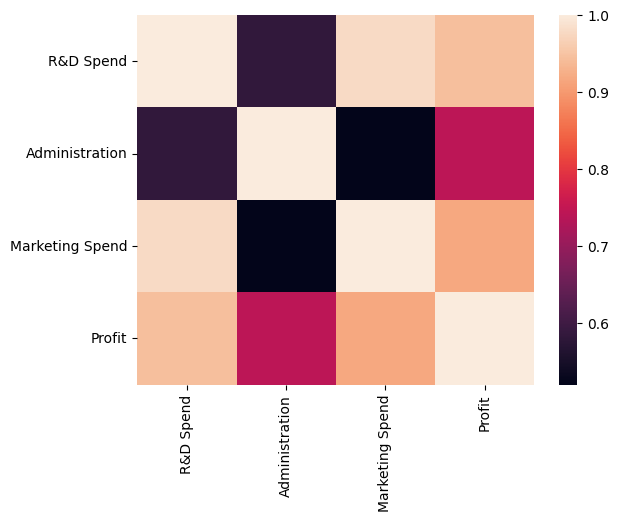

In [ ]:
# Data visualisation
# Building the Correlation matrix

sns.heatmap(companies.corr())

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

column_transformer = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [3])], 
    remainder="passthrough"
)

X = column_transformer.fit_transform(X)

In [ ]:
X = X[:, 1:]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89012.02672078,  87654.55773078,  94093.35179078, 175396.26159972,
        83356.61783953, 110395.79399954, 105008.30999971,  90687.29210078,
       164180.27019958,  53483.75717963,  66273.35330076, 150393.7159997 ,
       125971.2343008 ,  58694.93455076, 176344.52500084,  75297.23304952,
       118219.39439968, 163462.66540083, 132602.64999997, 181574.49679959,
        97483.55999954,  84909.71956077, 180684.32519972,  83391.64379077,
       104159.46700079, 100404.00210079,  64926.07999923,  56944.49152951,
        68210.88613076, 191792.06000082, 120738.69969968, 110848.56850079,
       101352.26559954, 137842.46719969,  63306.39937076, 107994.38100079,
       185502.5284996 , 171176.91649972, 174364.27759972, 117645.31059968,
        96616.92849953, 164336.60550083, 106865.86210079,  50468.96293963,
       116492.87149968,  57992.70704076, 158208.77349971,  78689.62407965,
       159514.13069971, 131051.70509969, 184555.11939973, 174329.25159972,
        92949.45565078,  

In [ ]:
# Calculating the Coefficients 
print(regressor.coef_)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.27320654e-11
 5.49574275e-13 1.00000000e+00]


In [ ]:
# Calculating the Intercept
print(regressor.intercept_)

1.4698744053021073e-06


In [ ]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0